# TIME SERIES ARIMA MODEL

In [1]:
# for arima model
!pip install pmdarima

In [2]:
# importing liberaries

# for data manupulation
import pandas as pd
import numpy as np

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# setting graph parameters
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline

# for model buildibng and evaluation
from statsmodels.tsa.stattools import adfuller     #to check whether data is stationery or not
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from datetime import datetime

# for ignoring future warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading the dataset and converted date columns to the index column and told that this is the timeseries dataset

df = pd.read_csv('https://raw.githubusercontent.com/dhanesh-sakre/DATA-SCIENCE/refs/heads/main/Assignment/Time%20Series/exchange_rate.csv', parse_dates=True)


In [4]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [5]:
# descriptive stats
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [6]:
# missing values
df.isna().sum()

date       0
Ex_rate    0
dtype: int64

In [7]:
# there is no missing values in the dataset

In [8]:
# duplicated values
df.duplicated().sum()

0

In [9]:
# exchange price values can be same for multiple datys so I cannot not remove the duplicated records in timeseries

In [10]:
# target column
df['Ex_rate']

0       0.785500
1       0.781800
2       0.786700
3       0.786000
4       0.784900
          ...   
7583    0.718494
7584    0.721839
7585    0.723197
7586    0.720825
7587    0.720825
Name: Ex_rate, Length: 7588, dtype: float64

<Axes: >

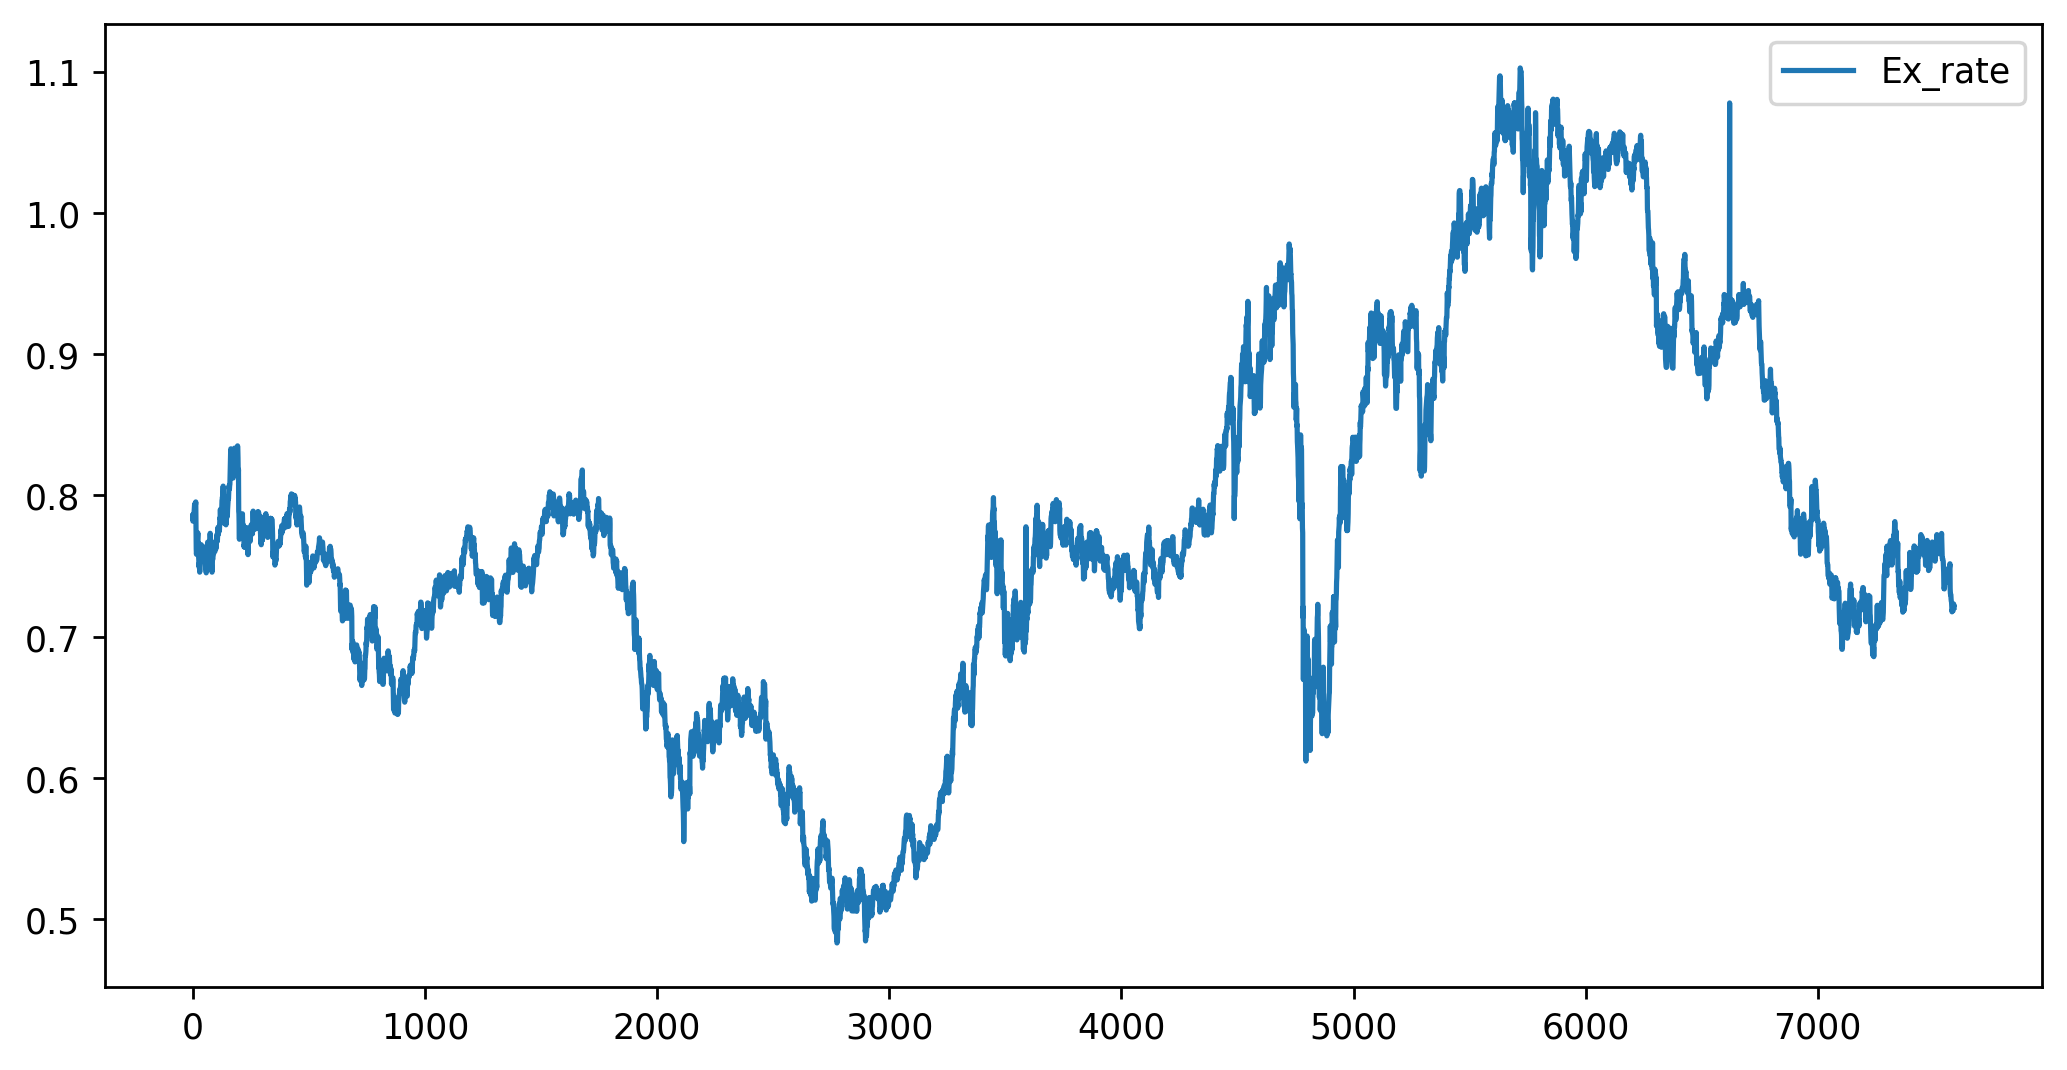

In [11]:
# plotting line plot for the data
sns.lineplot(df)

In [12]:
# Trend: Yes, the dataset shows a trend with an initial upward movement followed by a downward movement.
# Seasonality: No, there is no clear seasonality present in the dataset.

In [13]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [14]:
# I have to extract date from the give date because it is not present in the proper format

from datetime import datetime
df['Date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')
df['Date(ddmmyyyy)'] = df['Date'].dt.strftime('%d-%m-%Y')
df['Date(ddmmyyyy)']

0       01-01-1990
1       02-01-1990
2       03-01-1990
3       04-01-1990
4       05-01-1990
           ...    
7583    06-10-2010
7584    07-10-2010
7585    08-10-2010
7586    09-10-2010
7587    10-10-2010
Name: Date(ddmmyyyy), Length: 7588, dtype: object

In [15]:
# dropping date column
df.drop(columns=['Date', 'date'], inplace=True)

In [16]:
df.head()

,Ex_rate,Date(ddmmyyyy)
0,0.7855,01-01-1990
1,0.7818,02-01-1990
2,0.7867,03-01-1990
3,0.7860,04-01-1990
4,0.7849,05-01-1990


In [17]:
# setting DATE column as index column

df.set_index('Date(ddmmyyyy)', inplace=True)

In [18]:
df

,Ex_rate
Date(ddmmyyyy),
01-01-1990,0.785500
02-01-1990,0.781800
03-01-1990,0.786700
04-01-1990,0.786000
05-01-1990,0.784900
...,...
06-10-2010,0.718494
07-10-2010,0.721839
08-10-2010,0.723197


In [19]:
# adfuller to confirm the trend like wherther the data is stationery or non stationery
# it runs a hypothesis
# null hypothesis : data is non-stationary
# alternate hypothesis : data is stationary

In [20]:
adfuller(df['Ex_rate'])[1]

0.44923273535983155

In [21]:
# this is a value of p which is greater than 0.05 that means it is greater than alpha(0.05)
# that means fail to reject null hypothesis
# so this data is non-stationary

In [22]:
# differencing out to remove trend component from dataset
df['differenced'] = df['Ex_rate'].diff()
df.fillna(0,inplace=True)
df

,Ex_rate,differenced
Date(ddmmyyyy),,
01-01-1990,0.785500,0.000000
02-01-1990,0.781800,-0.003700
03-01-1990,0.786700,0.004900
04-01-1990,0.786000,-0.000700
05-01-1990,0.784900,-0.001100
...,...,...
06-10-2010,0.718494,-0.000207
07-10-2010,0.721839,0.003345
08-10-2010,0.723197,0.001358


<Axes: xlabel='Date(ddmmyyyy)', ylabel='differenced'>

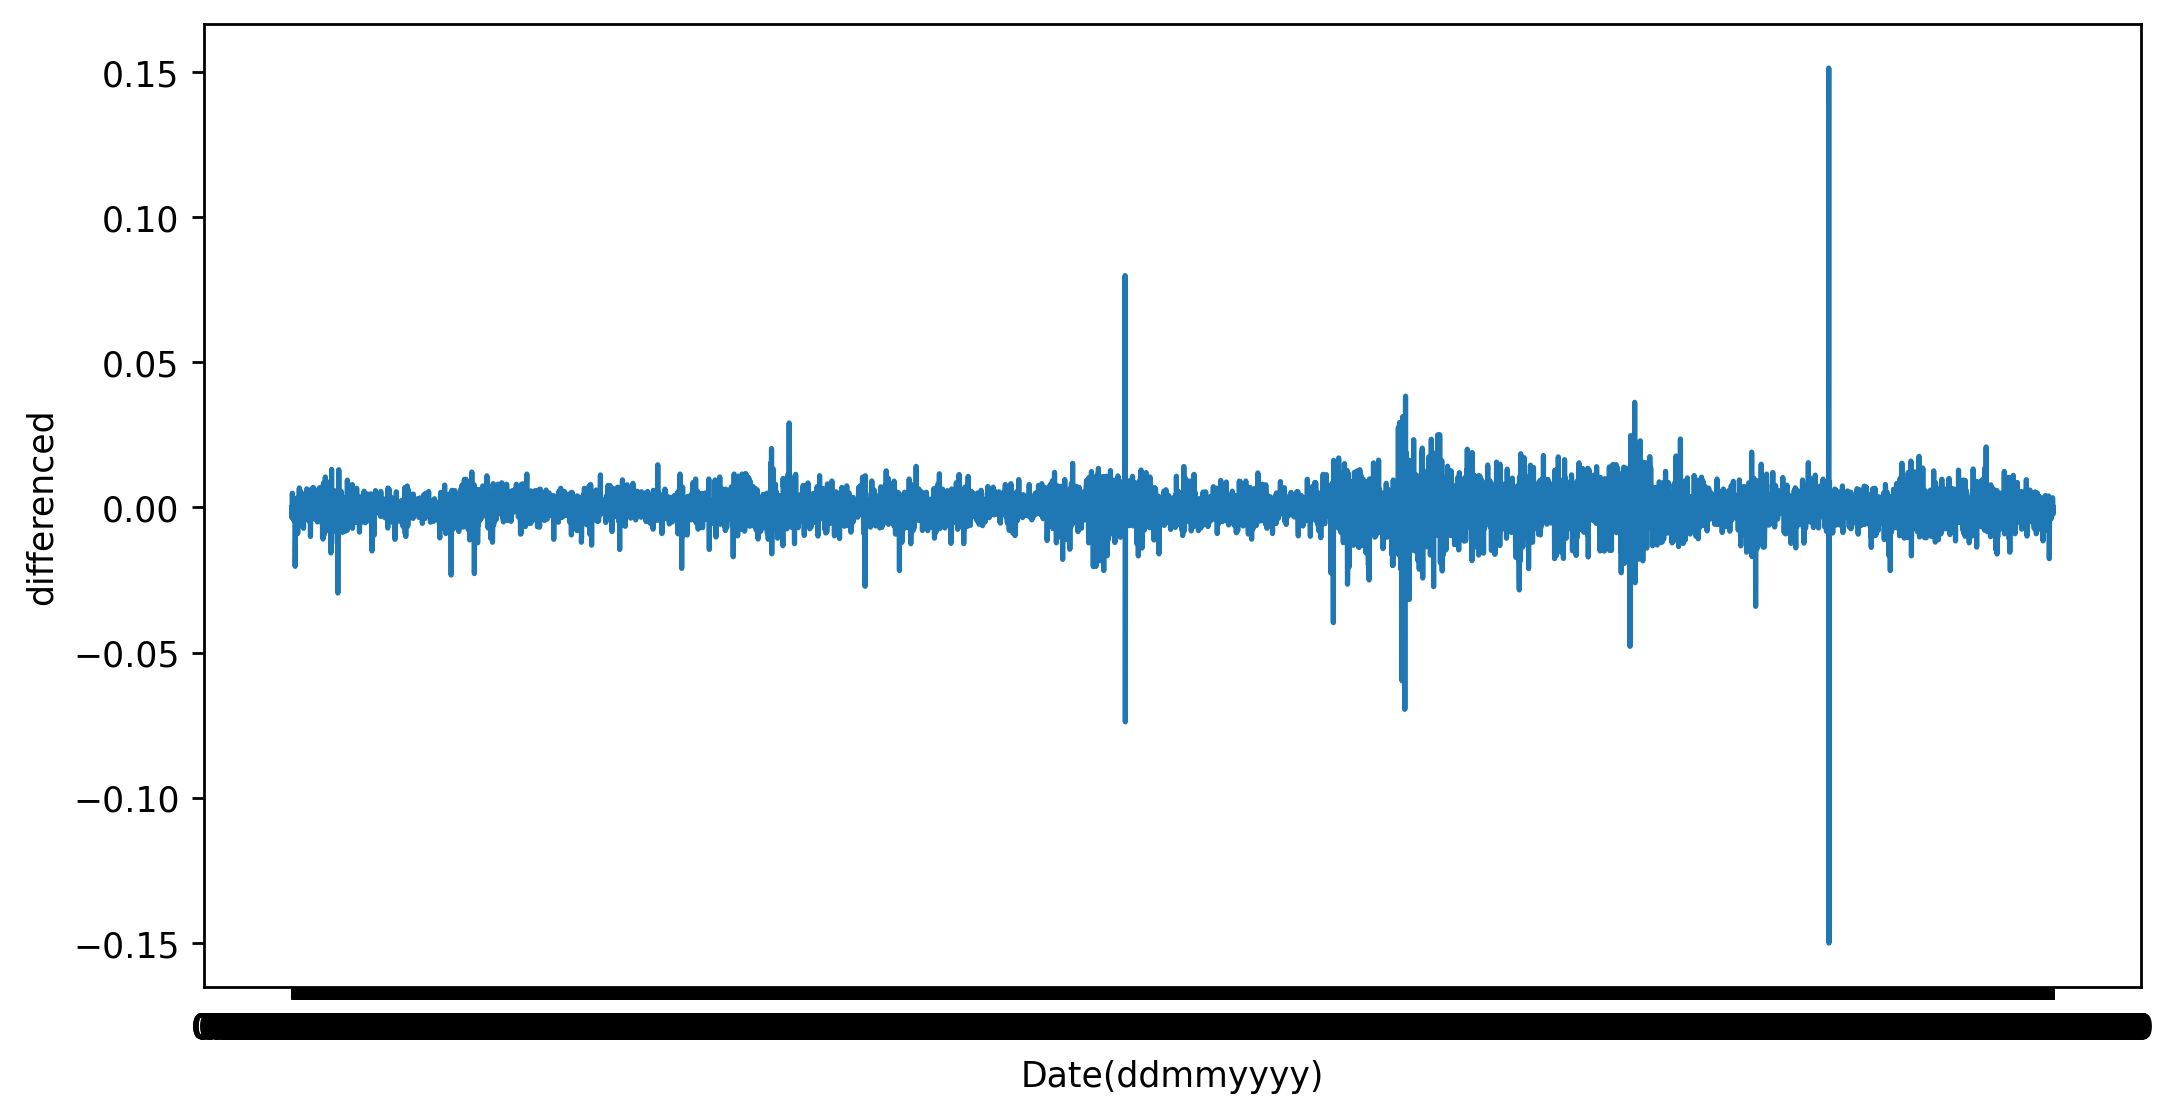

In [49]:
# line plot after removing trend component from data
sns.lineplot(df['differenced'])

In [23]:
# order of arima model
order = auto_arima(df['differenced'])
order

ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [24]:
# it has returne values of p, d, q which is order of arima model
# p = 1
# d = 0
# q = 0

# let's build the model

In [25]:
df.shape

(7588, 2)

In [33]:
# split the data in train and test part
train = df.iloc[:-1500]
test = df.iloc[-1500:]

In [34]:
df.tail()

,Ex_rate,differenced
Date(ddmmyyyy),,
06-10-2010,0.718494,-0.000207
07-10-2010,0.721839,0.003345
08-10-2010,0.723197,0.001358
09-10-2010,0.720825,-0.002372
10-10-2010,0.720825,0.000000


In [35]:
train.tail()

,Ex_rate,differenced
Date(ddmmyyyy),,
28-08-2006,1.037517,0.000968
29-08-2006,1.039933,0.002416
30-08-2006,1.036807,-0.003126
31-08-2006,1.033592,-0.003215
01-09-2006,1.036592,0.003000


In [36]:
test.head()

,Ex_rate,differenced
Date(ddmmyyyy),,
02-09-2006,1.043841,0.007249
03-09-2006,1.040745,-0.003096
04-09-2006,1.042731,0.001986
05-09-2006,1.039199,-0.003532
06-09-2006,1.038551,-0.000648


# MODEL BUILDING

In [37]:
train.shape

(6088, 2)

In [38]:
test.shape

(1500, 2)

In [39]:
# model building and training
arima = ARIMA(train['differenced'], order= (1, 0, 0)).fit()

In [40]:
test

,Ex_rate,differenced
Date(ddmmyyyy),,
02-09-2006,1.043841,0.007249
03-09-2006,1.040745,-0.003096
04-09-2006,1.042731,0.001986
05-09-2006,1.039199,-0.003532
06-09-2006,1.038551,-0.000648
...,...,...
06-10-2010,0.718494,-0.000207
07-10-2010,0.721839,0.003345
08-10-2010,0.723197,0.001358


In [41]:
df.shape

(7588, 2)

In [53]:
# getting prediction for test data
# I need to mention the row number form which row to uptill which row I want to pass to the model
ypred = arima.predict(start=6089, end=7588)
print(ypred.shape)
predicted = pd.DataFrame({'predicted': ypred})
predicted

(1500,)


,predicted
6089,0.000052
6090,0.000040
6091,0.000041
6092,0.000041
6093,0.000041
...,...
7584,0.000041
7585,0.000041
7586,0.000041
7587,0.000041


In [48]:
# measuring performance of model by using mean_square_error

mse_value = mean_squared_error(test['differenced'], ypred)
print(f'mean squared error of the model is {mse_value}')

mean squared error of the model is 5.146171420659629e-05


In [ ]:
# mse values is almost zero that means my model performing bery well on this dataset

# LINEAR MODELS

In [56]:
df.head()

,Ex_rate,differenced
Date(ddmmyyyy),,
01-01-1990,0.7855,0.0000
02-01-1990,0.7818,-0.0037
03-01-1990,0.7867,0.0049
04-01-1990,0.7860,-0.0007
05-01-1990,0.7849,-0.0011


In [73]:
# cerating necessary columns for the linear algorithm
df.drop(columns='t', inplace=True)
df['t'] = range(1,7589)
df['t_square'] = df.t*df.t
df['log_Ex_rate'] = np.log(df['Ex_rate'])
df.head() 

,Ex_rate,differenced,t_square,log_Ex_rate,t
Date(ddmmyyyy),,,,,
01-01-1990,0.7855,0.0000,1,-0.241435,1
02-01-1990,0.7818,-0.0037,4,-0.246156,2
03-01-1990,0.7867,0.0049,9,-0.239908,3
04-01-1990,0.7860,-0.0007,16,-0.240798,4
05-01-1990,0.7849,-0.0011,25,-0.242199,5


In [74]:
df.shape

(7588, 5)

In [78]:
# splitted the data in training and testing part
train_a = df.iloc[:-1500]
test_a = df.iloc[-1500:]

In [76]:
train.shape

(6088, 5)

In [77]:
test.shape

(1500, 5)

In [80]:
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
linear_model = smf.ols('Ex_rate~t', data=train_a).fit()
pred_linear = linear_model.predict(test[['t']])
rmse_linear = rmse(test['Ex_rate'] ,pred_linear)
rmse_linear

0.1437110288708153

In [ ]:
# the value of rmse is very close to zero that means model is performing very well on this dataset

In [ ]:
# ARIMA IS GIIVNG THE BEST PERFORMACE ON THIS DATASET IN COMPARISION TO THIS LINEAR REGRESSION ALGORITHM.